In [ ]:
import scipy
import pylab
import numpy as np
import pandas as pd
%matplotlib inline

In [ ]:
class TrafficSimulator(object):

    # Mapping from the current state of a cell's neighborhood to the next state
    # of the cell. This corresponds to Wolfram's Rule 184.
    ca_map = {
        (0, 0, 0): 0,
        (0, 0, 1): 0,
        (0, 1, 0): 0,
        (0, 1, 1): 1,
        (1, 0, 0): 1,
        (1, 0, 1): 1,
        (1, 1, 0): 0,
        (1, 1, 1): 1}

    def __init__(self, length=10, density=0.3, max_v = 5, p_slowdown = 0.1, interactive=False):
            '''
            Initialize new TrafficSimulator objects with the default parameter
            settings.

            Inputs:

             * length (int) The number of cells in the cellular automaton.
               Default: 50.

             * density (float) The proportion of cells that will be active (contain
               a car) when the cellular automaton is initialized. The active cells
               will be at random locations along the length of the CA. Default: 0.2.

             * interactive (bool) Whether or not we are running an interactive
               simulation. In CoCalc we have to run in non-interactive mode (False),
               but in your local Python environment you should be able to run in
               interactive mode (True). Default: False.

            '''
        self.interactive = interactive
        self.length = length
        self.density = density
        self.max_v = max_v
        self.p_slowdown = p_slowdown

        # Arrays for storing the current state and the next state (when we are
        # busy doing a state update).
        self.current_state = scipy.zeros(self.length)
        self.next_state = scipy.zeros(self.length)

        # initialize self
        self.initialize()
    
    def initialize(self):
        '''
        This will be called by the interactive pycxsimulator whenever the Reset
        button is clicked.
        '''
        # Set up a random initial state where the fraction of 1s in the array
        # equals the density parameter.
        random_indices = scipy.random.choice(
            range(self.length),
            size=int(round(self.density * self.length)),
            replace=False)
        self.current_state.fill(-1) #empty states
        self.current_state[random_indices] = random.randint(1,5)

        self.time = 0

    def draw(self):
        '''
        Draw the current state of the cellular automaton.
        '''
        ;
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure
        pylab.pcolor(
            self.current_state.reshape((1, self.length)),
            vmin = 0,
            vmax = 1,
            cmap = pylab.cm.binary)
        pylab.axis('image')
        pylab.title('density = ' + str(self.density) + '; t = ' + str(self.time))
        if not self.interactive:
            pylab.show()

    def simple_vis(self):
        print(''.join('.' if x == 1 else str(x) for x in self.state))
    

            
    def update(self):
        """One timestep
        Update velocities based on 3 rules:
        - Accelerate +1 if distance to next car > speed
        - Slow down to d-1 if distance to next car < speed
        - Randomly decrease by 1 if speed > 0
        Afterwards move each car forward
        """
        for i, v in enumerate(self.state):
            # update if there is a car (velocity)
            if v >= 0:
                dist = 1
                max_dist = min(v+1, self.max_v) # distance is velocity +1 until the cap of max_v
                while self.state[(i + d) % self.length] == -1 and d < max_d + 1:
                    d += 1
                if d > v + 1:
                    self.state[i] = min(self.state[i] + 1, self.max_v)
                else:
                    self.state[i] = d - 1
                if self.state[i] > 0 and rd.random() < self.p_slow:
                    self.state[i] -= 1

        new_state = sc.ones([self.length], int) * -1
        flow = 0
        for i, v in r_enumerate(self.state):
            if i + v > self.length:
                flow += 1
            if v >= 0:
                new_state[(i + v) % self.length] = v
        self.state = new_state
        
        return flow     
        
    
    
    def step(self):
        '''
        Update the state of the cellular automaton.
        '''
        # Update all cells, except the boundaries.
        for i in xrange(1, self.length - 1):
            neighborhood = self.current_state[i-1:i+2]
            self.next_state[i] = self.ca_map[tuple(neighborhood)]
        
        # Update the boundaries using periodic boundary conditions.
        neighborhood = self.current_state[[-1, 0, 1]]
        self.next_state[0] = self.ca_map[tuple(neighborhood)]
        neighborhood = self.current_state[[-2, -1, 0]]
        self.next_state[-1] = self.ca_map[tuple(neighborhood)]
        # Swap next state and current state
        self.current_state, self.next_state = self.next_state, self.current_state
        self.time += 1

    def set_density(self, value=None):
        '''
        The density of cars on the road. Only affects initialization (reset) of
        the simulation. The density must be a value between 0 and 1.
        '''
        if value is not None:
            self.density = min(1, max(0, float(value)))
        return self.density

In [18]:
traffic.update_rules()

AttributeError: 'TrafficSimulator' object has no attribute 'update_rules'

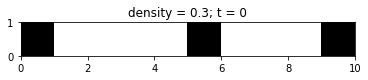

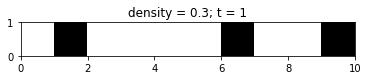

In [12]:
traffic = TrafficSimulator()
traffic.initialize()
traffic.draw()
traffic.step()
traffic.draw()
traffic.step()
traffic.draw()

hello


In [20]:
import random
from copy import deepcopy

class TrafficSimulation():
    def __init__(self, road_length, traffic_density, v_max, p, start_state = [], verbose = True):
        self.road_length = road_length
        self.traffic_density = traffic_density
        self.v_max = v_max
        self.p = p
        self.verbose = verbose
        self.throughput = 0
        if not start_state:
            self.state = []
            for i in range(road_length):
                if random.random() < traffic_density:
                    rand_init_speed = random.choice(range(v_max))
                    self.state.append(rand_init_speed)
                else:
                    self.state.append(-1)
        else:
            self.state = start_state


    def step(self):
        length = self.road_length
        speeds = deepcopy(self.state)

        for index, speed in enumerate(self.state):
            if speed < 0:
                continue

            # count spaces in front
            j = 1
            while self.state[(index + j)%length] < 0:
                j += 1

            # accelerate
            if speed < self.v_max and j > speed + 1:
                speeds[index] += 1

            # slow down due to cars
            if j <= speed:
                speeds[index] = j - 1

            # random slow down
            if speeds[index] > 0 and random.random() < self.p:
                speeds[index] -= 1

        if self.verbose:
            self.display(speeds)

        # update the positions
        updated_state = [-1]*length
        for index, speed in enumerate(speeds):
            if speed < 0:
                continue
            updated_state[(index + speed)%length] = speed
            self.throughput += float(speed)

        # iterate the state, and please stop the hate
        self.state = updated_state

    def get_flow(self):
        # distance covered by cars divided by number of cars
        flow = self.throughput / self.road_length
        return flow

    def display(state):
        print(''.join('.' if x == -1 else str(x) for x in state))

Exception: 

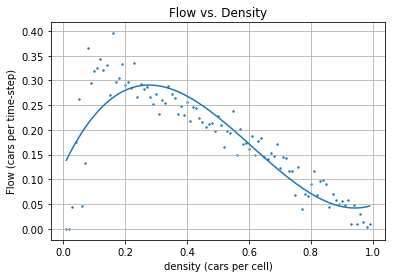

In [22]:
#from trafficsimulation import TrafficSimulation
# import seaborn as sns
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt


def get_flow_array(densities, iterations):
    avg_flow_arr = []
    for density in densities:
        sim = TrafficSimulation(100,density,5,.5, verbose=False)
        flow_sum = 0
        for i in range(iterations):
            sim.step()
            flow = sim.get_flow()
            flow_sum += flow
        avg_flow = flow_sum/(iterations*sim.road_length)
        avg_flow_arr.append(avg_flow)
    return avg_flow_arr

dens = np.arange(0.01,1.0,.01)
its = 200

flows = get_flow_array(dens, its)
dens = np.array(dens)
flows = np.array(flows)
# df = pd.DataFrame({'density':dens, 'flow':flows})
# ax = sns.lmplot(x='density', y='flow', fit_reg=True, data=df)
plt.scatter(dens,flows,s=2)
z = np.polyfit(dens, flows, 3)
f = np.poly1d(z)
plt.plot(dens, f(dens))
plt.xlabel('density (cars per cell)')
plt.ylabel('Flow (cars per time-step)')
plt.title('Flow vs. Density')
plt.grid(True)
plt.savefig("test.png")
raise Exception